In [52]:
import pandas as pd
#import matplotlib as plt
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

file_path = 'Data_EDA.csv'
df = pd.read_csv(file_path, sep=',')  


In [59]:
X = df.drop('G3', axis=1)
y = df['G3']

# Columnas categóricas y numéricas
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocesamiento: One-Hot Encoding para categóricas y escalado para numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

X_preprocessed = preprocessor.fit_transform(X)

print(X_preprocessed.shape)  # Para verificar la forma del array preprocesado


ColumnTransformer(transformers=[('num', StandardScaler(),
                                 Index(['age', 'Medu', 'Fedu', 'studytime', 'failures', 'famrel', 'absences'], dtype='object')),
                                ('cat', OneHotEncoder(),
                                 Index(['sex', 'address', 'Pstatus', 'guardian', 'schoolsup', 'famsup', 'paid',
       'higher', 'internet'],
      dtype='object'))])
(392, 26)


### Random Forest

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.25, random_state=42)

model = RandomForestRegressor(n_estimators=200, random_state=24)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Coeficiente de Determinación (R^2): {r2}')


Error Cuadrático Medio (MSE): 14.43576621435513
Coeficiente de Determinación (R^2): 0.21634505232615098


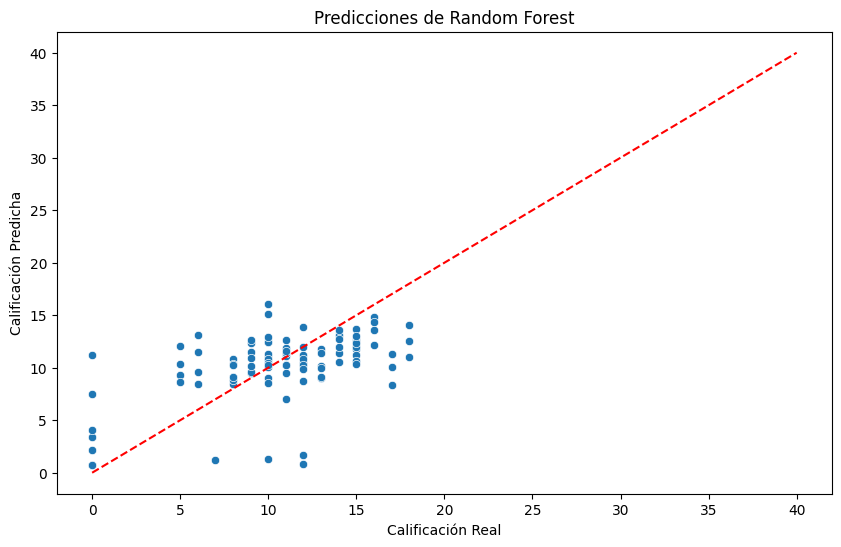

In [64]:

# Visualización de errores de predicción para Random Forest
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([0,20], [0, 20], 'r--')
plt.xlabel('Calificación Real')
plt.ylabel('Calificación Predicha')
plt.title('Predicciones de Random Forest')
plt.show()

### Gradient Boosting


In [56]:
X = df.drop('G3', axis=1)
y = df['G3']
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.25, random_state=42)

gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting - MSE: {mse_gb}, R^2: {r2_gb}")


Gradient Boosting - MSE: 15.564051475379035, R^2: 0.15509535389936335


### Ajustar hiperparametros

<small>Grid Search</small>


In [57]:
from sklearn.model_selection import GridSearchCV

# Definir el espacio de búsqueda para Gradient Boosting
param_grid_gb = {
    'n_estimators': [10, 50, 100],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [5,10,20]
}

grid_search_gb = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid=param_grid_gb, cv=5, scoring='neg_mean_squared_error')
grid_search_gb.fit(X_train, y_train)

print(f"Best parameters for Gradient Boosting: {grid_search_gb.best_params_}")

# Evaluar el modelo con los mejores parámetros
best_gb_model = grid_search_gb.best_estimator_
y_pred_best_gb = best_gb_model.predict(X_test)
mse_best_gb = mean_squared_error(y_test, y_pred_best_gb)
r2_best_gb = r2_score(y_test, y_pred_best_gb)

print(f"Best Gradient Boosting - MSE: {mse_best_gb}, R^2: {r2_best_gb}")


Best parameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 10}
Best Gradient Boosting - MSE: 14.408607343757593, R^2: 0.21781938926129973


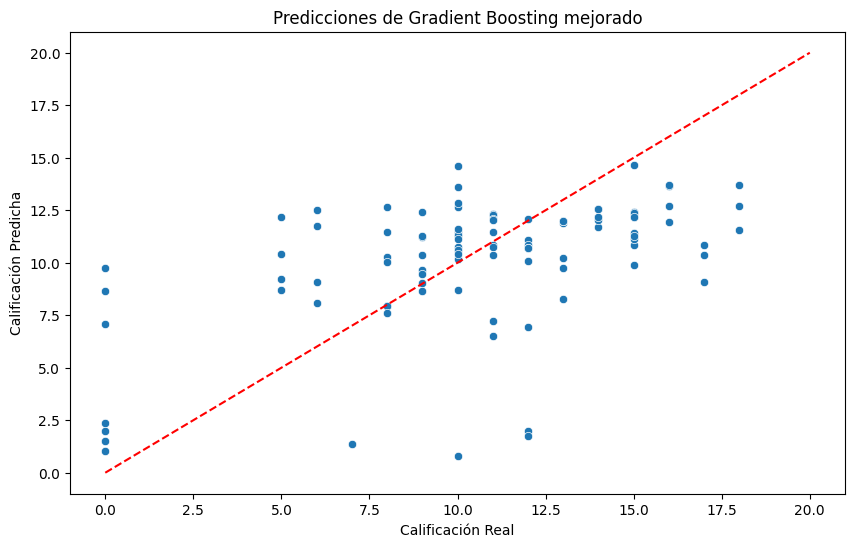

In [65]:

# Visualización de errores de predicción para Gradient Boosting
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_best_gb)
plt.plot([0, 20], [0, 20], 'r--')
plt.xlabel('Calificación Real')
plt.ylabel('Calificación Predicha')
plt.title('Predicciones de Gradient Boosting mejorado')
plt.show()


### Interpretación de Resultados
Random Forest Regressor
<small>
MSE: 14.4357
R^2: 0.2164
* MSE: medida de la magnitud promedio del error cuadrático. Un valor más bajo es mejor. Aquí, el MSE es 14.43, lo que indica que en promedio, las predicciones están a unos 14 puntos de la calificación real. Sin embargo, hay que tener en cuenta las magnitudes con las que se trabaja
* R^2 mide la proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes. Un valor de R^2 más cercano a 1 indica un mejor ajuste del modelo. Aquí, el R^2 es 0.21, lo que sugiere que el modelo explica el 21.6% de la variación en los datos. 
Esto no es muy alto y sugiere que hay margen para mejorar el modelo.
</small>
Gradient Boosting Regressor
<small>
MSE: 15.5640 (sin ajuste de hiperparámetros)
R^2: 0.1550 (sin ajuste de hiperparámetros)
MSE:  14.4086 (con ajuste de hiperparámetros)
R^2: 0.2178 (con ajuste de hiperparámetros)
Un R^2 negativo indicaria un rendimiento deficiente. 
Después de ajustar los hiperparámetros con Grid Search, el MSE mejora a 14.40, y el R^2 se acerca a 1 aunque sigue estando lejos
</small>